## Import libraries

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.3.0 --no-cache-dir


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 173.1 MB/s eta 0:00:000:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
# Fix random seed
np.random.seed(0)


## Load the dataset

In [4]:
df = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### Checking for missing values & categorical variables


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

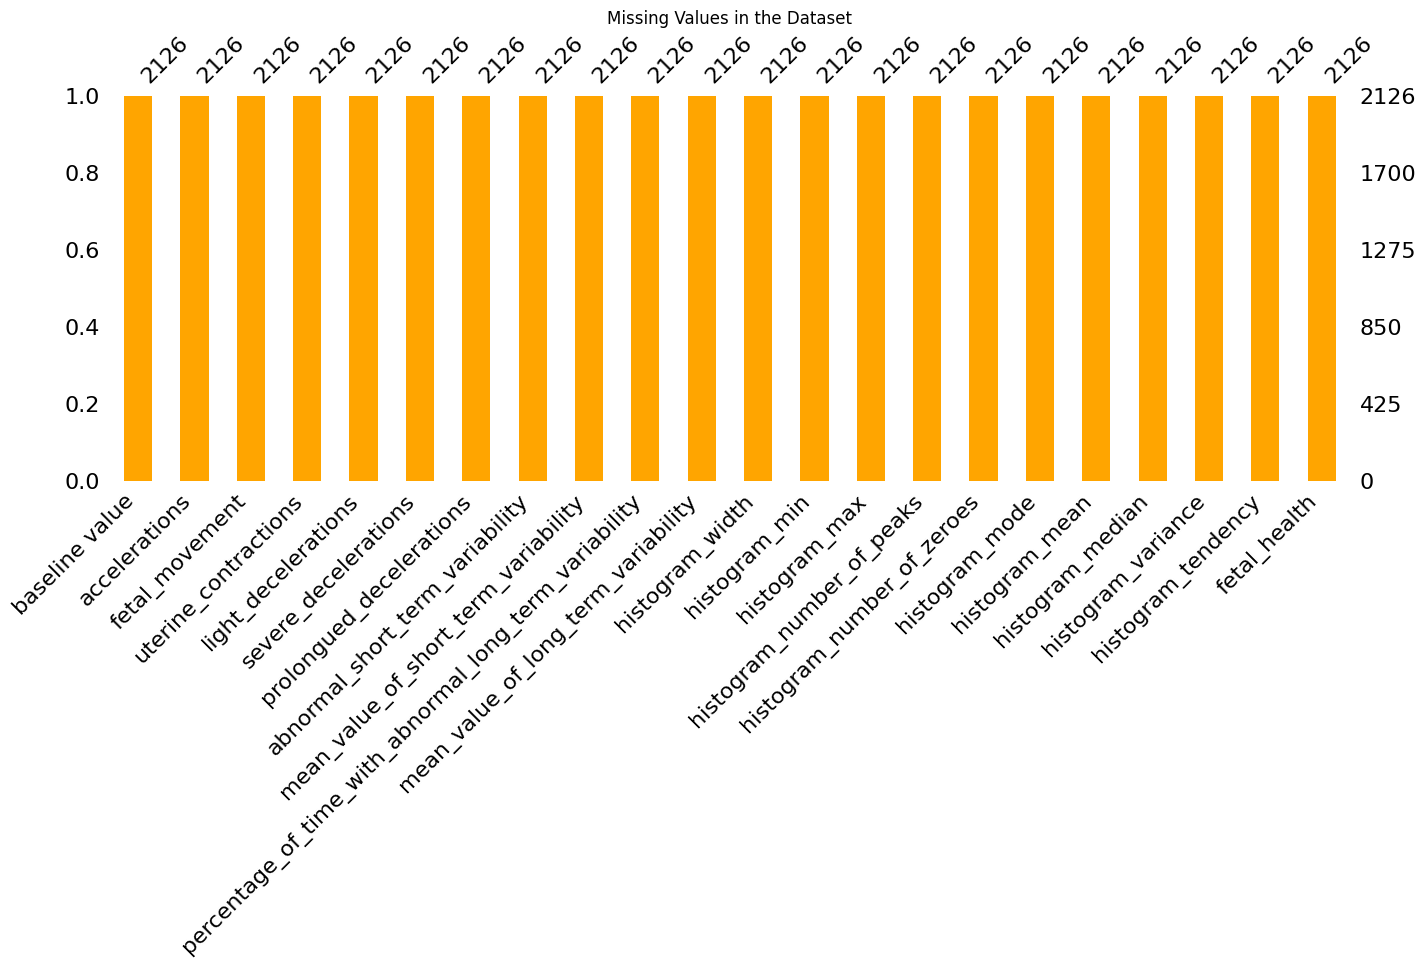

In [6]:
# Visualize missing values 
msno.bar(df, figsize=(16, 5), color="orange")
plt.title("Missing Values in the Dataset")
plt.show()


There are 2126 non-null values in all the attributes thus no missing values.
Datatype of all the features are float64 which works well with the model building.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Cardiotocograms (CTGs) are a simple and cost-accessible option to assess fetal health, allowing healthcare professionals to take timely action in order to prevent child and maternal mortality. The equipment works by sending ultrasound pulses and analyzing the reflected signals, providing information on fetal heart rate (FHR), fetal movements, uterine contractions, and more.

This dataset contains 2126 records extracted from CTG exams, annotated by expert obstetricians into three classes:
- Normal (1)
- Suspect (2)
- Pathological (3)

#### Features
- 'baseline_value': FHR baseline (beats per minute)
- 'accelerations': Number of accelerations per second
- 'fetal_movement': Number of fetal movements per second
- 'uterine_contractions': Number of uterine contractions per second
- 'light_decelerations': Number of light decelerations per second
- 'severe_decelerations': Number of severe decelerations per second
- 'prolongued_decelerations': Number of prolonged decelerations per second
- 'abnormal_short_term_variability': % time with abnormal short-term variability
- 'mean_value_of_short_term_variability': Mean of short-term variability
- 'percentage_of_time_with_abnormal_long_term_variability': % time with abnormal long-term variability
- 'mean_value_of_long_term_variability': Mean of long-term variability
- 'histogram_width': Width of FHR histogram
- 'histogram_min': Min frequency of FHR histogram
- 'histogram_max': Max frequency of FHR histogram
- 'histogram_number_of_peaks': No. of histogram peaks
- 'histogram_number_of_zeroes': No. of histogram zeros
- 'histogram_mode': Histogram mode
- 'histogram_mean': Histogram mean
- 'histogram_median': Histogram median
- 'histogram_variance': Histogram variance
- 'histogram_tendency': Histogram tendency

#### Target
'fetal_health':
- 1 Normal
- 2 Suspect
- 3 Pathological

## DATA ANALYSIS
### The analysis consist of:
- Count Plot: To visualize the distribution of the target variable fetal_health.
- Corelation Heat Map : To display the correlation coefficients between all features.
- Implot : Combines scatterplot and regression line between two variables.
- Swarm plot :  Shows all individual data points for a feature with respect to the target clas
- Boxen Plot:  Displays data distribution, outliers, and quantiles.

<Axes: xlabel='fetal_health', ylabel='count'>

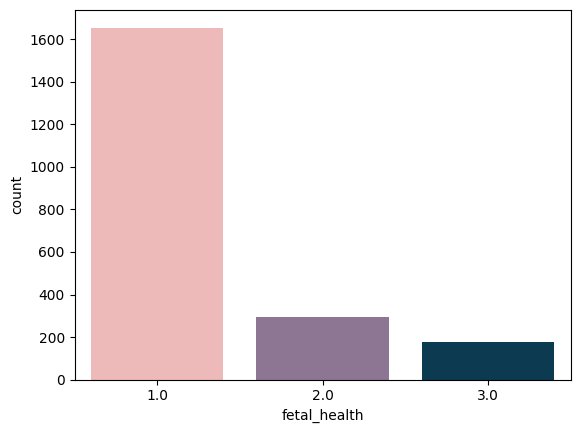

In [32]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= df, x="fetal_health",palette=colours)

The count plot of targets indicates an imbalance in data. This is a case that tends to provide misleading classification accuracy.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

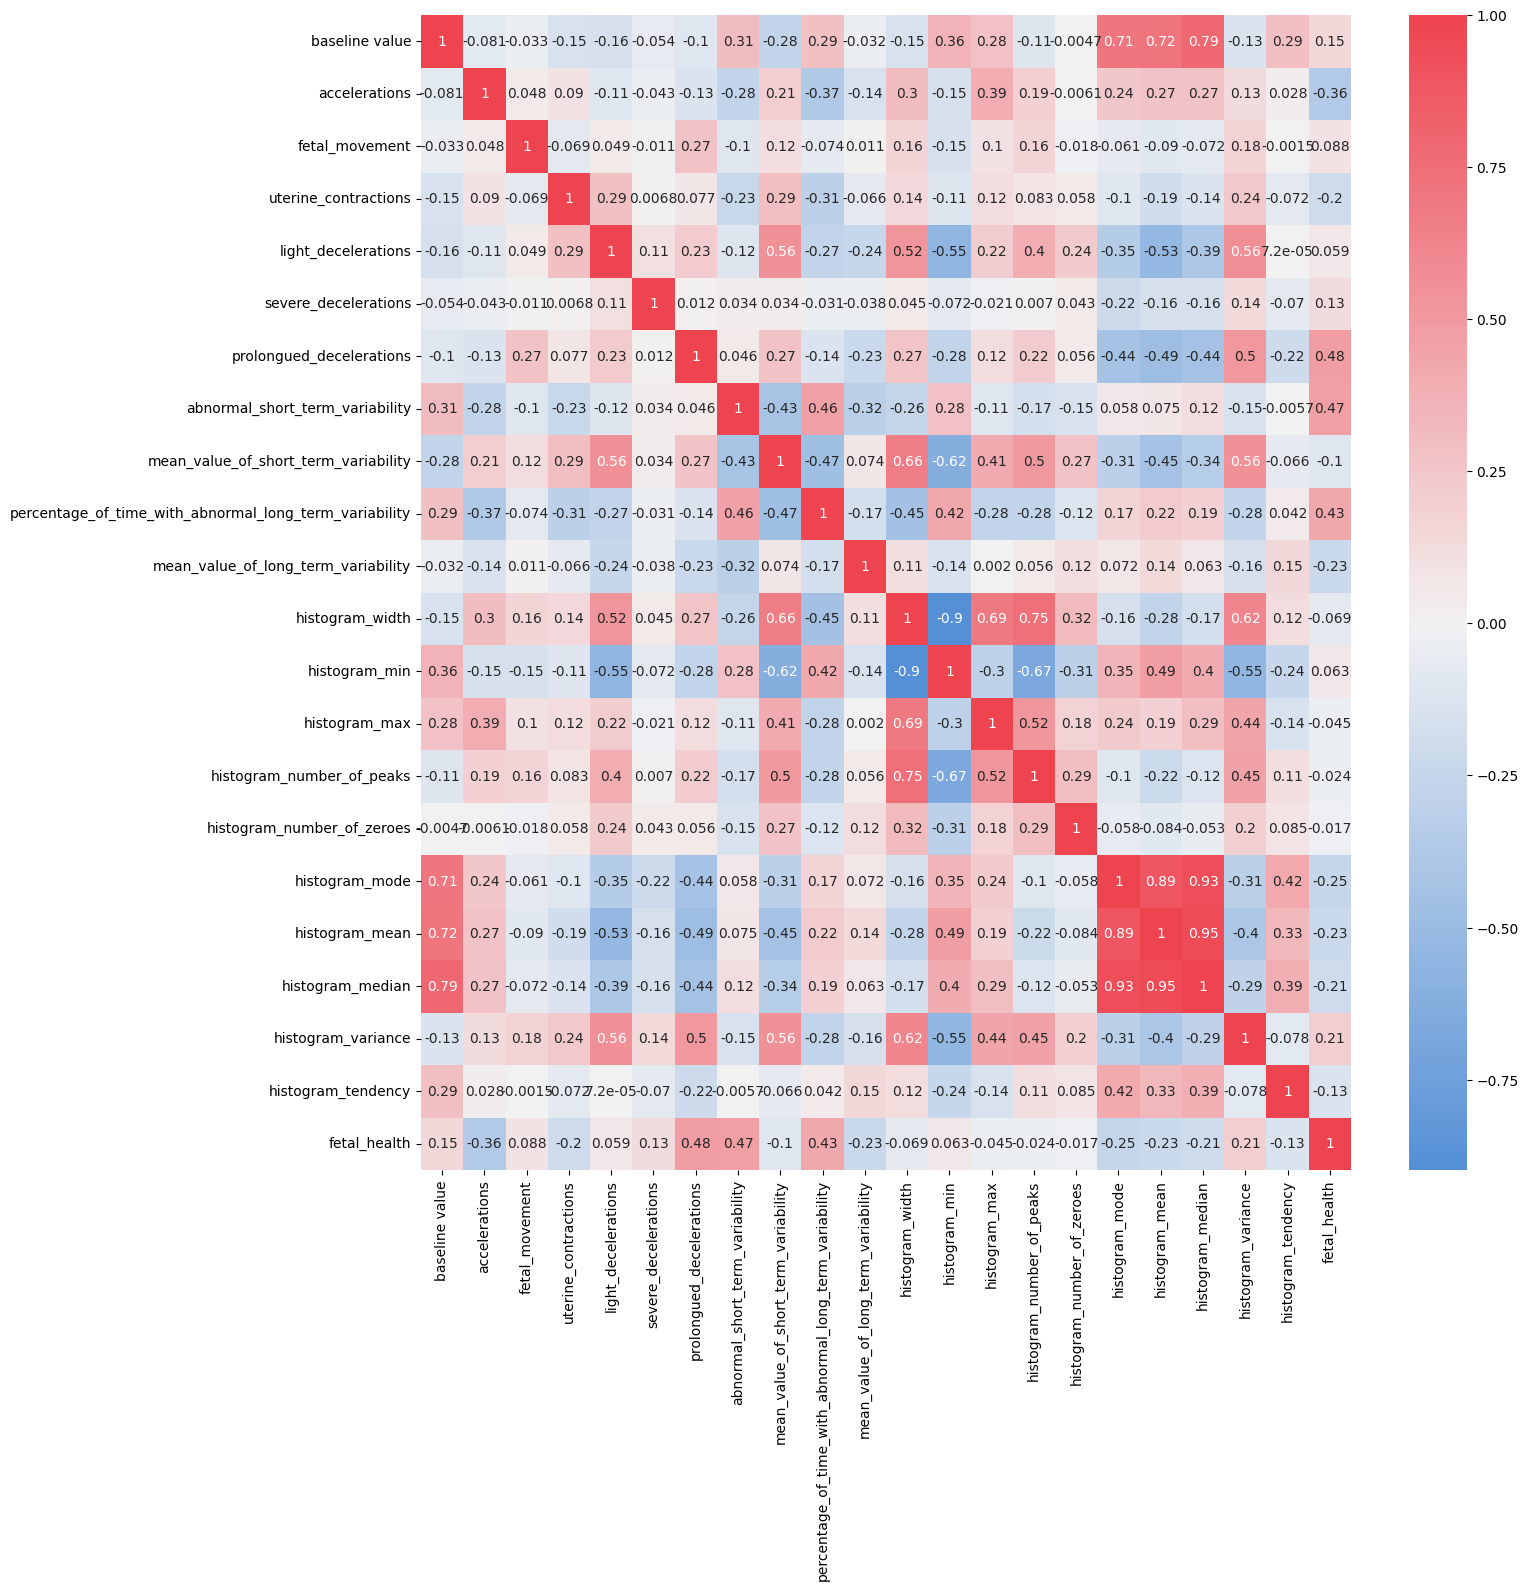

In [33]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Based on the correlation matix, it is clear that "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and "mean_value_of_long_term_variability" are the features with higher correlation with fetal_health. Let's have a closer look at these with fetal_movement on y axis. This will provide a clearer picture of trends that indicate fetus health.

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


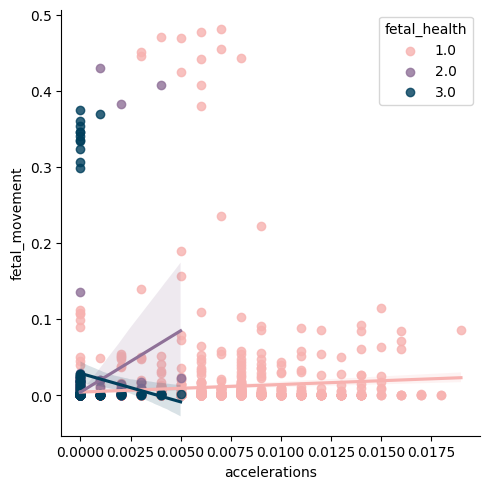

In [34]:
## Accelerations Vs Fetal Movement by Fetal Health
sns.lmplot(data =df,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


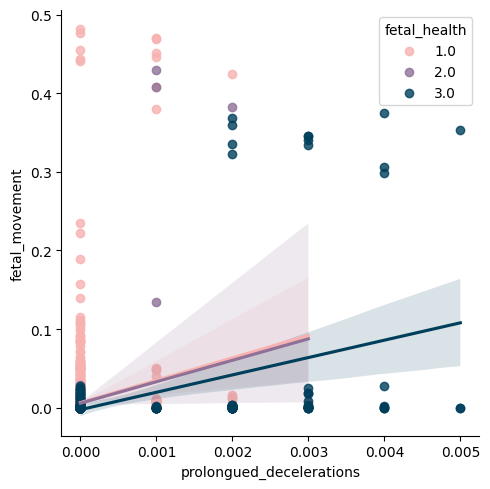

In [35]:
## Prolongued Decelerations Vs Fetal Movement by Fetal Health
sns.lmplot(data =df,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


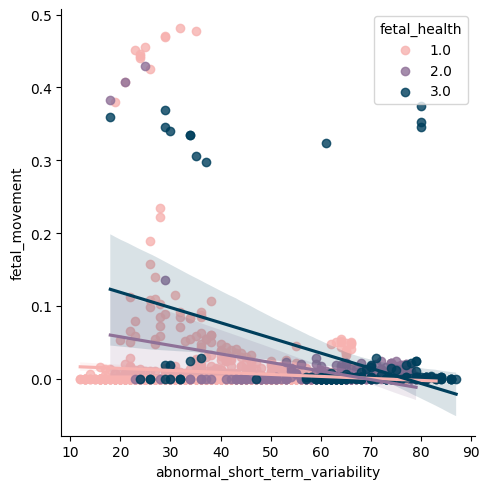

In [36]:
## Abnormal Short Term Variability Vs Fetal Movement by Fetal Health
sns.lmplot(data =df,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


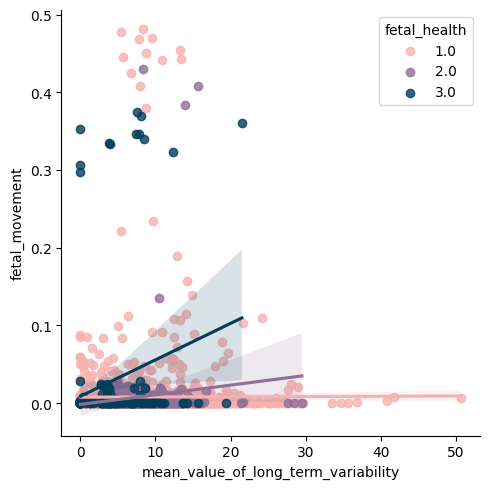

In [37]:
## Mean Value Of Long Term Variability Vs Fetal Movement by Fetal Health
sns.lmplot(data =df,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

We can see the rates of change of the above-mentioned values with each target show a specific trend. We can also spot outliers.

## Data Preprocessing


##### Manual Oversampling
The dataset was imbalanced, with most samples in the Normal class and fewer in Suspect and Pathological. This can cause models to perform poorly on minority classes. It upsamples the minority classes (Suspect and Pathological) by randomly duplicating existing samples until all classes have the same number of instances. 

In [8]:
# Split features (X) and label (y)
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# Convert to DataFrame for ease of manipulation
df_bal = pd.concat([X, y], axis=1)

# Separate classes
normal = df_bal[df_bal["fetal_health"] == 1.0]
suspect = df_bal[df_bal["fetal_health"] == 2.0]
pathological = df_bal[df_bal["fetal_health"] == 3.0]

# Determine target count
target_count = max(len(normal), len(suspect), len(pathological))

# Upsample minority classes
suspect_upsampled = suspect.sample(target_count, replace=True, random_state=42)
pathological_upsampled = pathological.sample(target_count, replace=True, random_state=42)

# Combine all into a new balanced DataFrame
df_balanced = pd.concat([normal, suspect_upsampled, pathological_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)  # Shuffle

# Split features and target again
X_balanced = df_balanced.drop("fetal_health", axis=1)
y_balanced = df_balanced["fetal_health"]

# Scale again using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)


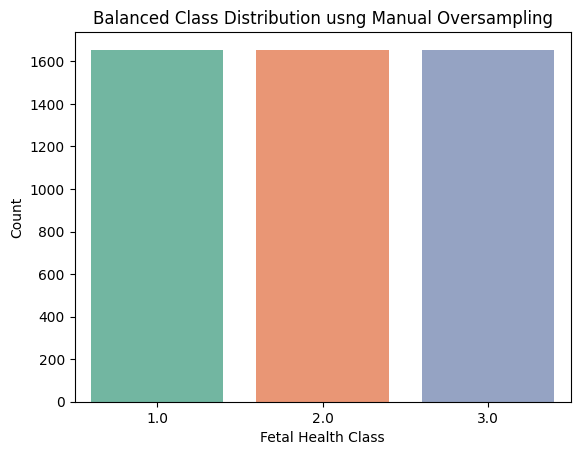

In [9]:
# Plot Balanced Class Distribution

sns.countplot(x=y_balanced, palette="Set2")
plt.title("Balanced Class Distribution usng Manual Oversampling")
plt.xlabel("Fetal Health Class")
plt.ylabel("Count")
plt.show()


After balancing, all three classes have the same number of samples (1655 each). This makes the dataset balanced, helping the model treat all classes fairly and improving performance on the minority classes.

This standardizes all feature values to have a mean of 0 and standard deviation of 1.
It is very important for SVM, which is sensitive to feature scale.

In [10]:
# Scaling (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (stratify to maintain class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

#### PCA is an unsupervised technique used for dimensionality reduction. I apply it here to simplify the dataset while keeping 95% variance.This helps reduce computation time and potential overfitting. Even in supervised tasks, PCA can improve model performance.


In [11]:
# Dimensionality Reduction with PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X.shape[1])
print("PCA features:", X_pca.shape[1])

Original features: 21
PCA features: 14


#### LDA is a supervised dimensionality reduction technique.It uses class labels to maximize class separability. Here, we reduce to 2 components since we have 3 classes. This helps improve classification and visualization.

In [12]:
# Dimensionality Reduction with LDA

lda = LinearDiscriminantAnalysis(n_components=2)  # For 3 classes
X_lda = lda.fit_transform(X_scaled, y)
print("LDA features:", X_lda.shape[1])


LDA features: 2


## Model Evaluation

In [13]:
def evaluate_model(X_data, y_data, model, model_name="Model"):
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.2, stratify=y_data, random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    print(f"--- {model_name} ---")
    print("Accuracy:", round(acc, 4))
    print("F1 Score (macro):", round(f1, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    return acc, f1


--- SVM (Original) ---
Accuracy: 0.8803
F1 Score (macro): 0.8047

Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.89      0.94       332
         2.0       0.57      0.88      0.69        59
         3.0       0.78      0.80      0.79        35

    accuracy                           0.88       426
   macro avg       0.78      0.86      0.80       426
weighted avg       0.91      0.88      0.89       426



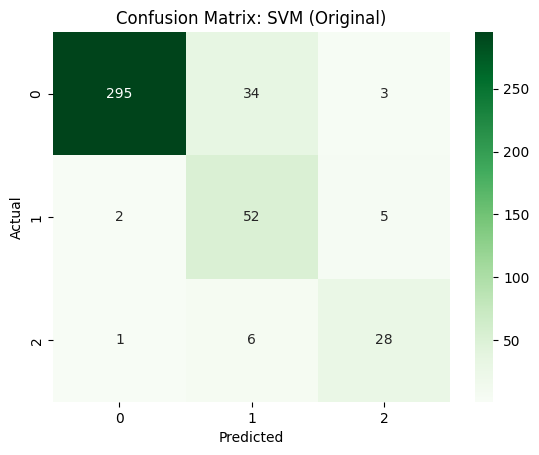

--- Decision Tree (Original) ---
Accuracy: 0.8967
F1 Score (macro): 0.812

Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       332
         2.0       0.73      0.61      0.67        59
         3.0       0.83      0.83      0.83        35

    accuracy                           0.90       426
   macro avg       0.83      0.80      0.81       426
weighted avg       0.89      0.90      0.89       426



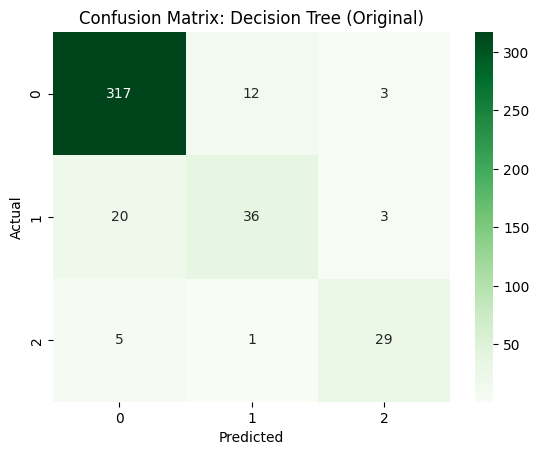

In [14]:
#  Evaluate on Original Data
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

acc_svm, f1_svm = evaluate_model(X_scaled, y, svm_model, "SVM (Original)")
acc_dt, f1_dt = evaluate_model(X_scaled, y, dt_model, "Decision Tree (Original)")


--- SVM + PCA ---
Accuracy: 0.8709
F1 Score (macro): 0.7915

Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.88      0.93       332
         2.0       0.55      0.85      0.67        59
         3.0       0.76      0.80      0.78        35

    accuracy                           0.87       426
   macro avg       0.76      0.84      0.79       426
weighted avg       0.90      0.87      0.88       426



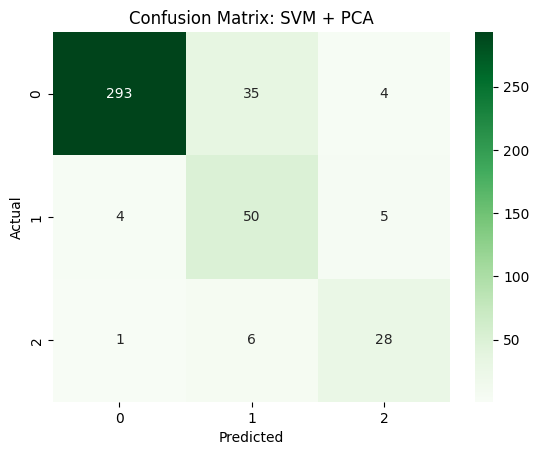

--- Decision Tree + PCA ---
Accuracy: 0.8732
F1 Score (macro): 0.7561

Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      0.94      0.93       332
         2.0       0.62      0.51      0.56        59
         3.0       0.72      0.83      0.77        35

    accuracy                           0.87       426
   macro avg       0.76      0.76      0.76       426
weighted avg       0.87      0.87      0.87       426



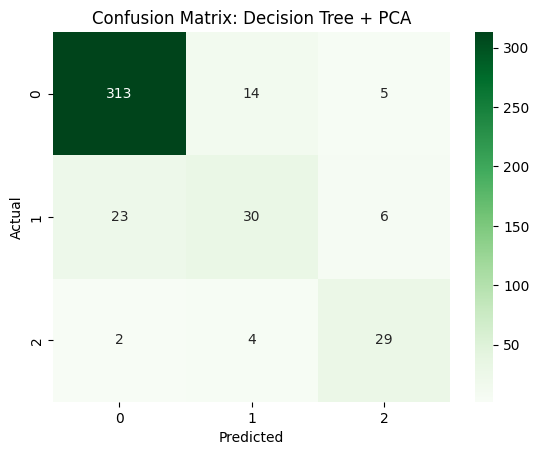

In [15]:
# Evaluate on PCA (Principal Component Analysis (PCA) ) Data
acc_svm_pca, f1_svm_pca = evaluate_model(X_pca, y, svm_model, "SVM + PCA")
acc_dt_pca, f1_dt_pca = evaluate_model(X_pca, y, dt_model, "Decision Tree + PCA")


--- SVM + LDA ---
Accuracy: 0.8357
F1 Score (macro): 0.7409

Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.84      0.91       332
         2.0       0.52      0.85      0.64        59
         3.0       0.58      0.80      0.67        35

    accuracy                           0.84       426
   macro avg       0.70      0.83      0.74       426
weighted avg       0.89      0.84      0.85       426



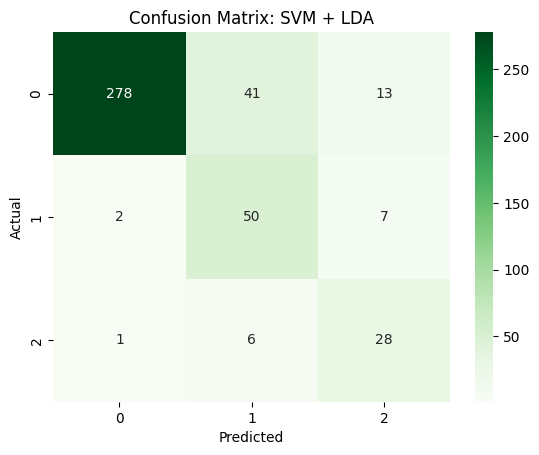

--- Decision Tree + LDA ---
Accuracy: 0.8662
F1 Score (macro): 0.7358

Classification Report:
               precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       332
         2.0       0.63      0.58      0.60        59
         3.0       0.73      0.63      0.68        35

    accuracy                           0.87       426
   macro avg       0.76      0.72      0.74       426
weighted avg       0.86      0.87      0.86       426



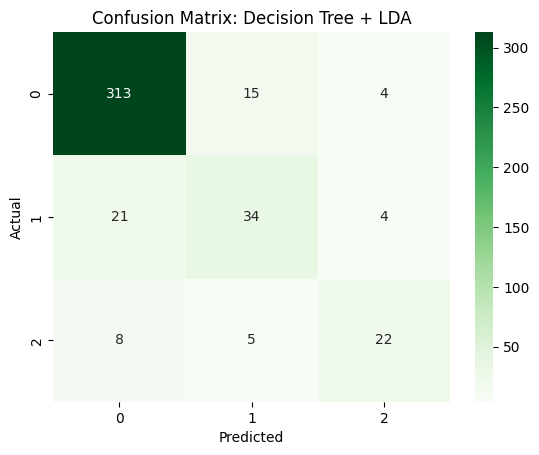

In [16]:
## Evaluate on LDA (Linear Discriminant Analysis) Data
acc_svm_lda, f1_svm_lda = evaluate_model(X_lda, y, svm_model, "SVM + LDA")
acc_dt_lda, f1_dt_lda = evaluate_model(X_lda, y, dt_model, "Decision Tree + LDA")


In [17]:
## Summary Comparison Table
results = pd.DataFrame({
    "Model": ["SVM", "SVM + PCA", "SVM + LDA", "DT", "DT + PCA", "DT + LDA"],
    "Accuracy": [acc_svm, acc_svm_pca, acc_svm_lda, acc_dt, acc_dt_pca, acc_dt_lda],
    "F1 Score": [f1_svm, f1_svm_pca, f1_svm_lda, f1_dt, f1_dt_pca, f1_dt_lda]
})

print("\nPerformance Comparison:")
print(results)



Performance Comparison:
       Model  Accuracy  F1 Score
0        SVM  0.880282  0.804661
1  SVM + PCA  0.870892  0.791534
2  SVM + LDA  0.835681  0.740913
3         DT  0.896714  0.811964
4   DT + PCA  0.873239  0.756136
5   DT + LDA  0.866197  0.735825


DT without dimensionality reduction is the most effective model for this dataset.

Dimensionality reduction (PCA, LDA) may be useful for visualization or computational efficiency but can hurt classification performance if not tuned carefully.

#### Feature Selection Methods : Filter and Wrapper Methods

##### Filter Method (e.g., Correlation):
This method selects features based on their statistical relationship with the target, helping us quickly remove irrelevant or redundant features. It's fast and independent of any model.

##### Wrapper Method (RFE):
Recursive Feature Elimination (RFE) uses a model to select the best-performing features by repeatedly training and ranking them. It finds the most useful features for prediction, improving accuracy and reducing overfitting.


--- SVM (Filtered + RFE) ---
Accuracy: 0.8944
F1 Score (macro): 0.7831

Classification Report:

              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       332
         2.0       0.67      0.58      0.62        59
         3.0       0.86      0.71      0.78        35

    accuracy                           0.89       426
   macro avg       0.82      0.75      0.78       426
weighted avg       0.89      0.89      0.89       426



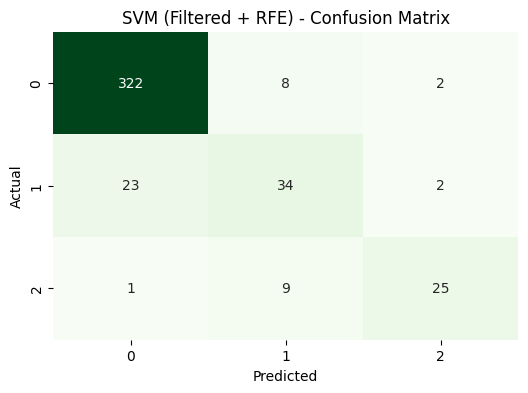


--- Decision Tree (Filtered + RFE) ---
Accuracy: 0.8991
F1 Score (macro): 0.8134

Classification Report:

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       332
         2.0       0.72      0.64      0.68        59
         3.0       0.81      0.83      0.82        35

    accuracy                           0.90       426
   macro avg       0.82      0.81      0.81       426
weighted avg       0.90      0.90      0.90       426



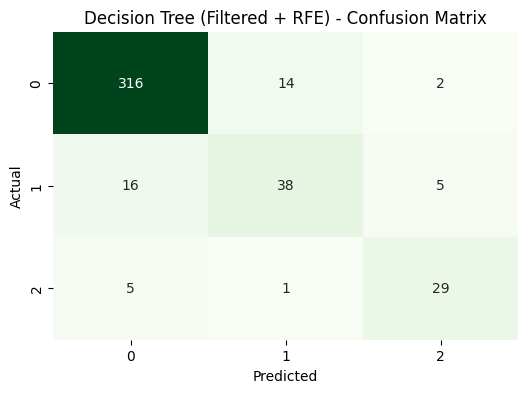

In [18]:
# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 2: Filter method - correlation > 0.1
corr_matrix = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1).corr()
cor_target = abs(corr_matrix["fetal_health"])
filtered_features = cor_target[cor_target > 0.1].index.tolist()
filtered_features.remove("fetal_health")

# Step 3: RFE wrapper method
X_filtered = X_scaled_df[filtered_features]
rfe_selector = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
rfe_selector.fit(X_filtered, y)
final_features = X_filtered.columns[rfe_selector.support_].tolist()



# Step 5: Train models
svm_model = SVC(kernel='rbf', random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Step 6: Predictions
svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Step 7: Evaluation function
def print_classification_summary(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (macro): {f1:.4f}\n")
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred, digits=2))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 8: Run evaluations
print_classification_summary(y_test, svm_pred, "SVM (Filtered + RFE)")
print_classification_summary(y_test, dt_pred, "Decision Tree (Filtered + RFE)")


Feature selection using Filtered + RFE was highly effective, especially for the Decision Tree, leading to the best overall model performance.

This confirms that removing irrelevant or redundant features can improve generalization and increase model interpretability.

#### Comparison Bar Chart
Creating a bar chart of accuracy across all 8 model variations helps visualize which combination of model and feature technique performs best. This allows easy comparison and supports data-driven decisions about the most effective preprocessing and modeling strategy

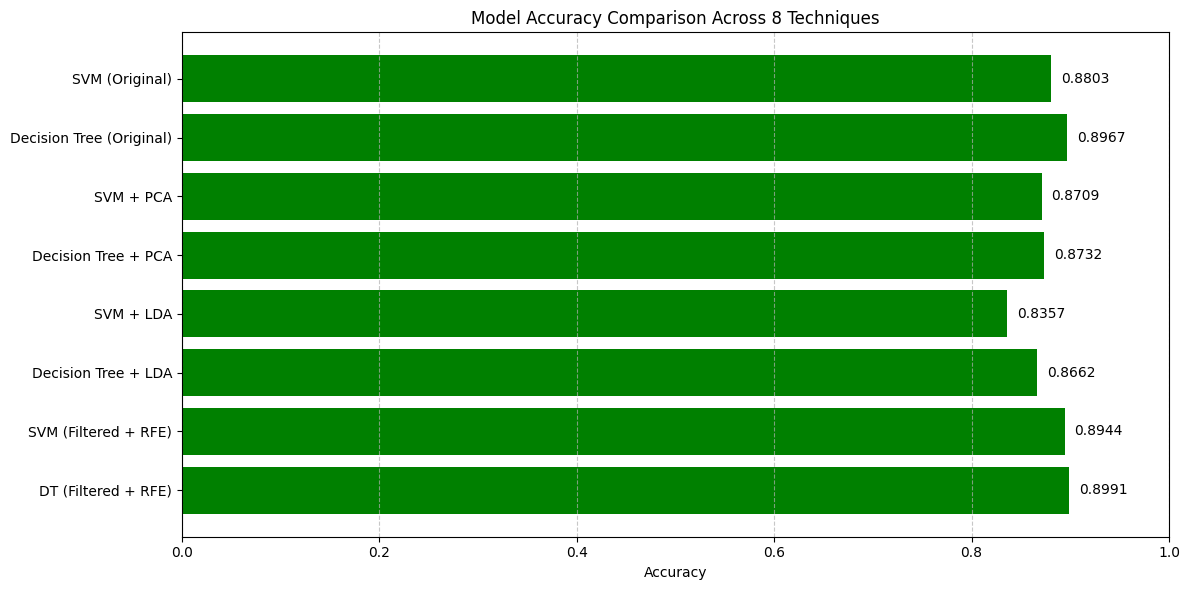

In [19]:
# Accuracy values from different models
model_names = [
    "SVM (Original)", "Decision Tree (Original)",
    "SVM + PCA", "Decision Tree + PCA",
    "SVM + LDA", "Decision Tree + LDA",
    "SVM (Filtered + RFE)", "DT (Filtered + RFE)"
]

accuracy_values = [
    acc_svm, acc_dt,
    acc_svm_pca, acc_dt_pca,
    acc_svm_lda, acc_dt_lda,
    accuracy_score(y_test, svm_pred), accuracy_score(y_test, dt_pred)
]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(model_names, accuracy_values, color='green')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison Across 8 Techniques")
plt.xlim(0, 1)

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f"{width:.4f}", va='center')

plt.gca().invert_yaxis()  # Highest accuracy on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


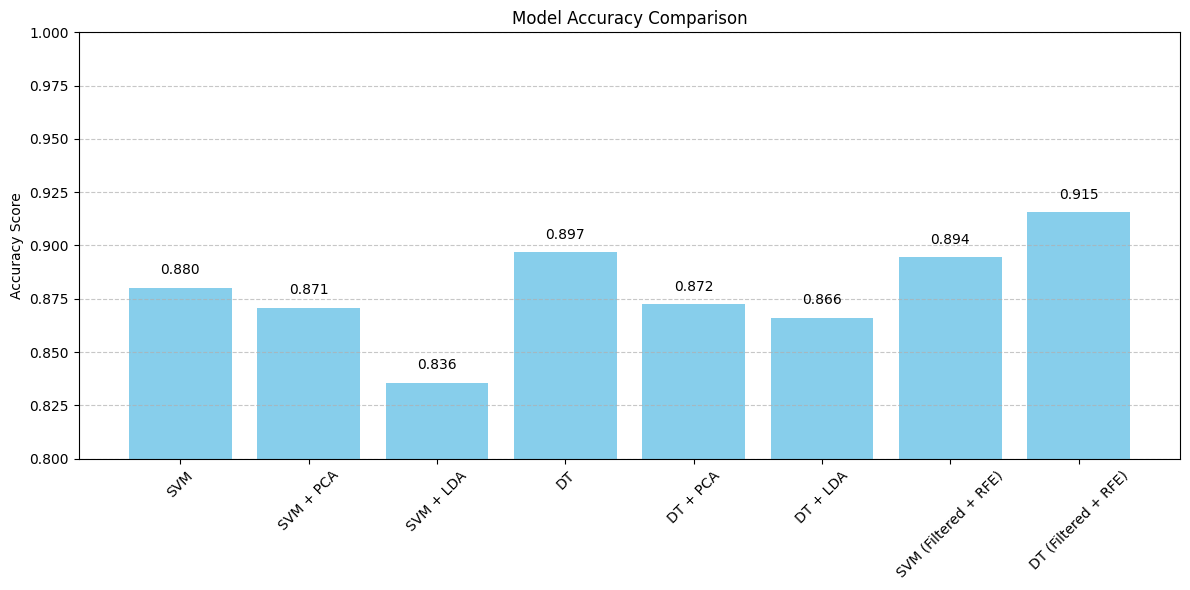

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Accuracy values from your experiments
accuracy_values = {
    "SVM": 0.880282,
    "SVM + PCA": 0.870892,
    "SVM + LDA": 0.835681,
    "DT": 0.896714,
    "DT + PCA": 0.872329,
    "DT + LDA": 0.866197,
    "SVM (Filtered + RFE)": 0.894366,
    "DT (Filtered + RFE)": 0.915493
}

# Create a DataFrame
accuracy_df = pd.DataFrame(list(accuracy_values.items()), columns=["Model", "Accuracy"])

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"], color='skyblue')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f"{yval:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Observations:
- Best Performing Model:
DT (Filtered + RFE) achieved the highest accuracy of 0.915, outperforming all other models.
This confirms that feature selection (filter + wrapper) significantly improves model performance by reducing noise and redundancy.

- Strong Baseline:
DT (Original) and SVM (Filtered + RFE) also performed well, scoring 0.897 and 0.894, respectively.

- Impact of PCA & LDA:
Models with PCA and LDA generally had lower accuracy.
For example, SVM + LDA dropped to 0.836, the lowest among all, indicating potential loss of critical discriminative information during dimensionality reduction.

- Filtered + RFE Models:
These models consistently improved over their original or PCA/LDA counterparts, showing the power of combining filter-based correlation screening and RFE wrapper-based selection.

